In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('wordnet')
from nltk.stem.wordnet import WordNetLemmatizer
import string

from sklearn.feature_extraction.text import CountVectorizer

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from scipy import stats
from sklearn.metrics import accuracy_score
from sklearn.metrics import auc, roc_curve, roc_auc_score
from sklearn.metrics import f1_score, classification_report

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/monicabellare/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/monicabellare/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [17]:
df = pd.read_csv("../data/preprocessed_cleaned_body.csv")

In [18]:
df.head()

,Body,Bias,cleaned_body
0,Abortion rights advocates have asked the U.S. ...,1.67,abortion right advocate asked u supreme court ...
1,A federal appeals court rejected the most dire...,0.67,federal appeal court rejected direct constitut...
2,As part of the Trump administration's effort t...,-2.75,part trump administration effort slow migrant ...
3,"President Donald Trump and ""the Trump of the T...",-4.33,president donald trump trump tropic brazilian ...
4,"U.S Senator Elizabeth Warren, who is competing...",-10.00,u senator elizabeth warren competing democrati...


In [34]:
right = df.loc[df['Bias'] > 0]
left = df.loc[df['Bias'] <= 0]

# 1 = Right bias, 0 = Left bias
right['Bias'] = 1
left['Bias'] = 0

cat_df = pd.concat([right, left])

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [35]:
cat_df.head()

,Body,Bias,cleaned_body
0,Abortion rights advocates have asked the U.S. ...,1,abortion right advocate asked u supreme court ...
1,A federal appeals court rejected the most dire...,1,federal appeal court rejected direct constitut...
7,Michael Cohen has been officially disbarred in...,1,michael cohen ha officially disbarred new york...
13,President Donald Trump has vetoed a resolution...,1,president donald trump ha vetoed resolution st...
15,Newly-released body camera footage reveals the...,1,newlyreleased body camera footage reveals dram...


In [36]:
X = cat_df.iloc[:, cat_df.columns != 'Bias']
y = cat_df['Bias']

In [37]:
X.head()

,Body,cleaned_body
0,Abortion rights advocates have asked the U.S. ...,abortion right advocate asked u supreme court ...
1,A federal appeals court rejected the most dire...,federal appeal court rejected direct constitut...
7,Michael Cohen has been officially disbarred in...,michael cohen ha officially disbarred new york...
13,President Donald Trump has vetoed a resolution...,president donald trump ha vetoed resolution st...
15,Newly-released body camera footage reveals the...,newlyreleased body camera footage reveals dram...


In [38]:
bow_transformer = CountVectorizer(max_features = 800)
bow = bow_transformer.fit_transform(X['cleaned_body'])

X = pd.DataFrame(bow.toarray(), columns=bow_transformer.get_feature_names())

In [39]:
col_names = X.columns

scaler = MinMaxScaler()
scaled = scaler.fit_transform(X)
X = pd.DataFrame(scaled, columns=col_names)

In [40]:
X.head()

,ability,able,abortion,abuse,access,according,account,accused,across,act,...,would,wrong,wrote,year,yearold,yet,york,you,young,zealand
0,0.0,0.0,0.52381,0.0,0.2,0.0,0.0,0.0,0.142857,0.000000,...,0.018182,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0
1,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.000000,0.0,0.153846,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0
2,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.018182,0.0,0.000000,0.000000,0.0,0.0,0.130435,0.000000,0.000000,0.0
3,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.000000,0.058824,...,0.000000,0.0,0.000000,0.076923,0.0,0.0,0.000000,0.000000,0.000000,0.0
4,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.000000,0.0,0.000000,0.025641,0.4,0.0,0.000000,0.066667,0.111111,0.0


In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# Logical Regression

In [42]:
# from https://towardsdatascience.com/logistic-regression-using-python-sklearn-numpy-mnist-handwriting-recognition-matplotlib-a6b31e2b166a

logisticRegr = LogisticRegression()
logisticRegr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [43]:
predictions = logisticRegr.predict(X_test)

In [48]:
# Use score method to get accuracy of model
score = logisticRegr.score(X_test, y_test)
print(score*100,"%")

70.16706443914082 %


In [52]:
probs = logisticRegr.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)
print('ROC Score is: ', roc_auc)

ROC Score is:  0.6424752739909115


In [47]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

In [36]:
cm = metrics.confusion_matrix(y_test, predictions)
print(cm)

[[256  34]
 [ 91  38]]


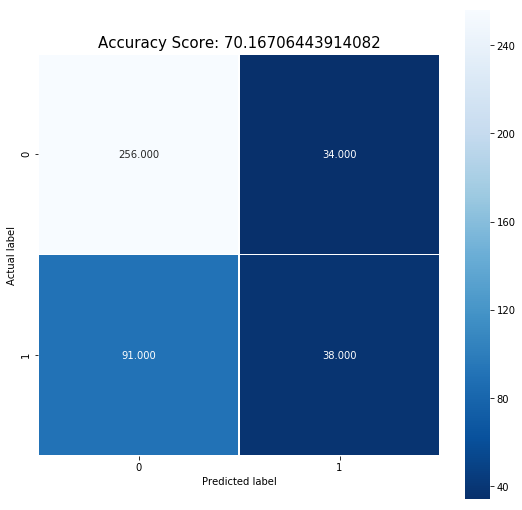

In [40]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score*100)
plt.title(all_sample_title, size = 15);